# Teoría: Herramientas para trabajar con grafos: NetworkX.

Vamos a trabajar un poco con NetworkX para ver las funcionalidades básicas. 

* Con ``add_edges_from``, en el caso de que llamemos a algún nodo que no existe, lo crea automáticamente. 
* 

NetworkX no es homogéneo, hay funciones que son miembros de la clase grafo y otras que son externas y como argumento usan un grafo. 

In [4]:
import networkx as nx
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G=nx.Graph()

G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7])

G.add_edges_from([(0, 1), (0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 7),
(1, 4), (3, 4), (5, 10)])

print(G.nodes)

print(G.edges)

[0, 1, 2, 3, 4, 5, 6, 7, 10]
[(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (3, 5), (3, 4), (4, 6), (5, 7), (5, 10), (6, 7)]


Podemos añadir atributos al propio objeto, a los grafos, nodos o ramas. los atributos sep onene ne forma clave-valor. se pueden asignar cuando creamos el objeto o ya creado. 

Vamos a cambiar un par de atributos:
* Vamos a añadir un atributo al objeto grafo.
* Un atributo a uno de los nodos. 

In [3]:
G=nx.Graph(nombre = "red genética")

G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7])

G.add_edges_from([(0, 1), (0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 7),
(1, 4), (3, 4), (5, 10)])

G.nodes[1]["nombre"] = "IT34"

print(G.nodes)

print(G.edges)

print(G.nodes[1])

[0, 1, 2, 3, 4, 5, 6, 7, 10]
[(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (3, 5), (3, 4), (4, 6), (5, 7), (5, 10), (6, 7)]
{'nombre': 'IT34'}


Normalmente los grafos no se crean así. Lo normal es utilizar grafos predefinidos o desde ficheros. 

## Grafos con topología predefinida

Los grafos en la documentación están clasificados por tipos: generales, redes sociales, árboles, grafos de comunidades, grafos geométricos, etc.

* ``complete_graph()``: crea un grafo ocmpleto, es decir, un cliqué. es un grafo o subgrafo donde todos estásn conectados ocn todos. 
* ``path_graph(n)``: si n = 4, crea un grafo en el que cada uno se conecta con el siguiente. 
* ``cycle_graph(n)``: crea un ciclo. 
* ``graph_atlas(n)``: genera el grafo número n del libro _The Atlas Graph_.  ``graph_atlas_g()``: devuelve el listado de grafos que puede crear la función anterior. 

Estas funciones no son de ningún objeto grafo, no son métodos, sino que devuelven objetos de tipo grafo. 






# Ejercicio 1

Vamos a crear a partir de un grafo ocmpleto, un cliqué, el grafo del otro día. Para ello:

* Creamos el cliqué. 
* 


In [4]:
G=nx.Graph()
H=nx.complete_graph(8)
G.add_nodes_from(H)
G.add_edges_from([(0,1),(0,2),(1,3),(2,4),(3,5),(4,6),(5,7),(6,7),
(1,4),(3,4),(5,6)])
print(G.nodes)
print(G.edges)


[0, 1, 2, 3, 4, 5, 6, 7]
[(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (3, 5), (3, 4), (4, 6), (5, 7), (5, 6), (6, 7)]


# Ejercicio 2

Leer un grafo a partir de un fichero con formato de lista de adyacencia. 

['0', '1', '2', '3', '4', '5', '6', '7']
[('0', '1'), ('0', '2'), ('1', '3'), ('1', '4'), ('2', '4'), ('3', '4'), ('3', '5'), ('4', '6'), ('5', '6'), ('5', '7'), ('6', '7')]


/home/diego/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


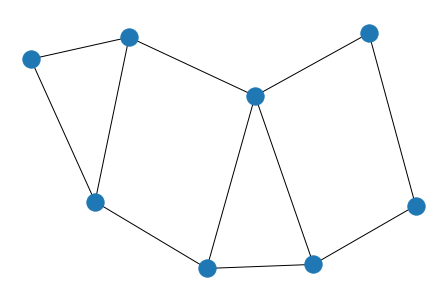

In [5]:
G = nx.Graph()
G = nx.read_adjlist("adjacencyList_test1.txt")

print(G.nodes)
print(G.edges)

nx.draw(G)

# Ejercicio 3

El grado medio de K es la media de la Poisson. La Poisson tiene la media en el pico, y la media de la dsitribución coincide con el grado medio de los nodos. 

* El número de ramas será 5000 * 0.02.
* Si dividimos el número de ramas por el de vértices y multiplciamos por dos, será aprocimadamente el grado medio de los nodos. 

Esto que acabamos de hacer debe ser una de las primeras cosas que debemos a hacer en el análisis de grafos, además de densidad, índice de clusterización, camino característico, etc. ESta métrica nos permite dinstinguirlo de un grafo aleatorio: lo más probable es que salga en las redes aleatorias como libres de escala. 

Se ha equivocado, no es una Poisson, sino una binomial Una binomial es una distribución discreta que cuando n tiende a infinitivo es igual a una normal. Una binomial nace de repetir numerosas veces un caso de éxito-no éxito, es decir, una distribución de Bernoulli. 

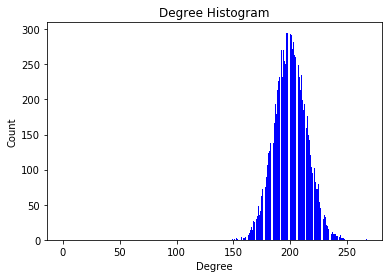

In [6]:
G = nx.gnp_random_graph(10000, 0.02)
L=nx.degree_histogram(G)
plt.bar(range(len(L)),L, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

# Ejercicio 4

Layouts. Las funciones son:
* draw_circular(G, **kwargs): Layout circular.
* draw_kamada_kawai(G, **kwargs): Layout dirigido por fuerzas Kamada-Kawai.
* draw_random(G, **kwargs): Layout aleatorio.
* draw_spectral(G, **kwargs): Layout espectral.
* draw_spring(G, **kwargs): Layout de muelle.
* draw_shell(G, **kwargs): Layout tipo concha.

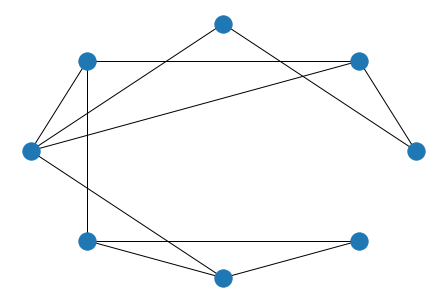

In [7]:
G=nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7])
G.add_edges_from([(0,1),(0,2),(1,3),(2,4),(3,5),(4,6),(5,7),(6,7),
(1,4),(3,4),(5,6)])
#probad diferentes layouts aquí
nx.draw_shell(G)

25/02/20
## Ejercicio 5

Construir malla regular monodimensional y calcular índice de clusterización medio y camino característico. 

In [8]:
G_reg = nx.watts_strogatz_graph(1000, 4, 0)

print("índice medio de clusterización:", nx.average_clustering(G_reg))

print("Camino característico medio:", nx.average_shortest_path_length(G_reg))


G_prob = 

índice medio de clusterización: 0.5
Camino característico medio: 125.37537537537537


## Ejercicio 6

Qué P necesitmaos para que mepecemos a tener un grafo de mundo pequeño. 

El valor de $k$ que tendremos que despejar en estos grafos es 4. A partir de la fórmula $P = \frac{1}{k*N}$, vemos que $P = 0.00025$

In [9]:
G_peq01 = nx.watts_strogatz_graph(1000, 4, 0.00000001)

print("índice medio de clusterización:", nx.average_clustering(G_peq01))

print("Camino característico medio:", nx.average_shortest_path_length(G_peq01))

índice medio de clusterización: 0.5
Camino característico medio: 125.37537537537537


In [10]:
G_peq02 = nx.watts_strogatz_graph(1000, 4, 0.01)

print("índice medio de clusterización:", nx.average_clustering(G_peq02))

print("Camino característico medio:", nx.average_shortest_path_length(G_peq02))

índice medio de clusterización: 0.4882
Camino característico medio: 34.60727727727728


In [11]:
G_peq03 = nx.watts_strogatz_graph(1000, 4, 0.00025)

print("índice medio de clusterización:", nx.average_clustering(G_peq03))

print("Camino característico medio:", nx.average_shortest_path_length(G_peq03))

índice medio de clusterización: 0.5
Camino característico medio: 125.37537537537537


## Ejercicio 7: Grafos libres de escala

1. Construir un grafo libre de escala con NetworkX y pintar la distribución de grado de los nodos.

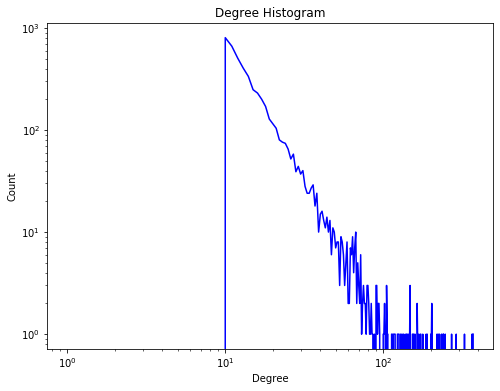

In [21]:
G_free = nx.barabasi_albert_graph(5000, 10)

L = nx.degree_histogram(G_free)
fig1 = plt.figure(figsize = (8, 6))
plt.plot(range(len(L)),L, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xscale("log", nonposx='clip')
plt.yscale("log", nonposy='clip')
plt.show()

In [22]:
print("índice medio de clusterización:", nx.average_clustering(G_free))

print("Camino característico medio:", nx.average_shortest_path_length(G_free))

índice medio de clusterización: 0.01787563704455046
Camino característico medio: 2.9146190838167634


In [23]:
G_random = nx.gnm_random_graph(5000, 50000)

print("índice medio de clusterización:", nx.average_clustering(G_random))

print("Camino característico medio:", nx.average_shortest_path_length(G_random))

índice medio de clusterización: 0.003923594472936777
Camino característico medio: 3.1260503300660134


# Ejercicio 8

* Generar un grafo aleaotio y un grafo regular.
* Eliminar en ambos 2000 ramas elegidas aleatoriamente mediante remove_edge() y calculad el tamaño de la mayor ocmponente conexa en ambos grafos. 




In [86]:
from random import randrange
G_random = nx.gnm_random_graph(1000, 4000)
G_reg = nx.watts_strogatz_graph(1000, 8, 0)
print(len(list(G_reg.edges)))
print(len(list(G_random.edges)[700]))

print(list(G_reg.edges)[678])

# list(G_reg.edges)[4000]

4000
2
(167, 168)


In [98]:
num_edges = 3999
G_random = nx.gnm_random_graph(1000, 4000)
G_reg = nx.watts_strogatz_graph(1000, 8, 0)



for i in range(2000):
    x = randrange(0, num_edges)
    
    edge_random = list(G_random.edges)[x]
    edge_reg = list(G_reg.edges)[x]
    
    G_random.remove_edge(edge_random[0], edge_random[1])
    G_reg.remove_edge(edge_reg[0], edge_reg[1])
    
    num_edges -= 1
    
print(nx.info(max(nx.connected_component_subgraphs(G_random), key = len)))
print(nx.info(max(nx.connected_component_subgraphs(G_reg), key = len)))

Name: 
Type: Graph
Number of nodes: 975
Number of edges: 2000
Average degree:   4.1026
Name: 
Type: Graph
Number of nodes: 992
Number of edges: 1999
Average degree:   4.0302


In [1]:
max(nx.connected_component_subgraphs(G_random), key = len)

NameError: name 'nx' is not defined

In [5]:
?nx.remove_edge

Object `nx.remove_edge` not found.
